# Product Recommendation

## Reference

Association Rule Mining
- https://stackabuse.com/association-rule-mining-via-apriori-algorithm-in-python/
- http://rasbt.github.io/mlxtend/user_guide/frequent_patterns/association_rules/

Collaborative Filtering Model
- https://medium.datadriveninvestor.com/how-to-build-a-recommendation-system-for-purchase-data-step-by-step-d6d7a78800b6

## Initialization

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx

from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

plt.rc('font', family='Angsana New')

## Load Dataset

In [2]:
df = pd.read_csv("Customer Preference Survey.csv")
df.head(3)

,ประทับเวลา,จักรยานเสือภูเขา,คอลลาเจน,Brownie อวกาศ,แม่โขง,Botox,กัญชา,กัญชง,เครื่องวัดความดัน,หลอดไฟเปลี่ยนสีได้,...,ห้องน้ำแมวอัตโนมัติ,กระเป๋า chanel,ข้าวขาหมูคากิคาจักออนไลน์,ถั่งเช่า,หมอนสุขภาพสำหรับคนนอนไม่หลับ,อาหารแมวคลีนเพื่อสุขภาพลดหุ่น,น้ำส้มดีโด้,Software ถูกลิขสิทธิ์,ครีมกันแดด,Unnamed: 62
0,2564/03/20 11:29:58 ก่อนเที่ยง GMT+7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,พริกทอด
1,2564/03/20 11:33:10 ก่อนเที่ยง GMT+7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2564/03/20 11:53:44 ก่อนเที่ยง GMT+7,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,...,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,เคย,เคย,NaN


## Data Cleansing

#### Remove unnamed column

In [3]:
df.drop(columns={'Unnamed: 62', 'ประทับเวลา'}, axis=1, inplace=True)
df.head(3)

,จักรยานเสือภูเขา,คอลลาเจน,Brownie อวกาศ,แม่โขง,Botox,กัญชา,กัญชง,เครื่องวัดความดัน,หลอดไฟเปลี่ยนสีได้,คอร์ส bikini wax,...,มะม่วงเบา,ห้องน้ำแมวอัตโนมัติ,กระเป๋า chanel,ข้าวขาหมูคากิคาจักออนไลน์,ถั่งเช่า,หมอนสุขภาพสำหรับคนนอนไม่หลับ,อาหารแมวคลีนเพื่อสุขภาพลดหุ่น,น้ำส้มดีโด้,Software ถูกลิขสิทธิ์,ครีมกันแดด
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,...,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,เคย,เคย


#### Remove null data

In [4]:
df = df[2:]
df.head(3)

,จักรยานเสือภูเขา,คอลลาเจน,Brownie อวกาศ,แม่โขง,Botox,กัญชา,กัญชง,เครื่องวัดความดัน,หลอดไฟเปลี่ยนสีได้,คอร์ส bikini wax,...,มะม่วงเบา,ห้องน้ำแมวอัตโนมัติ,กระเป๋า chanel,ข้าวขาหมูคากิคาจักออนไลน์,ถั่งเช่า,หมอนสุขภาพสำหรับคนนอนไม่หลับ,อาหารแมวคลีนเพื่อสุขภาพลดหุ่น,น้ำส้มดีโด้,Software ถูกลิขสิทธิ์,ครีมกันแดด
2,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,...,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,เคย,เคย
3,ไม่เคย,เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,...,เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,เคย
4,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,เคย,ไม่เคย,...,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,เคย,เคย,เคย


In [5]:
check_null = df.isnull().sum()
check_null[check_null > 0]

หมูแดดเดียว                 1
เครื่องย่อยเศษอาหาร.1       1
เครื่องตรวจน้ำตาลในเลือด    1
แพ็คเกจไทยเที่ยวไทย         1
กระเป๋า chanel              1
ถั่งเช่า                    1
dtype: int64

In [6]:
df.fillna('ไม่เคย', inplace=True)
check_null = df.isnull().sum()
check_null[check_null > 0]

Series([], dtype: int64)

## Data Processing

In [7]:
df.replace({'เคย': 1, 'ไม่เคย': 0}, inplace=True)
df.head(3)

,จักรยานเสือภูเขา,คอลลาเจน,Brownie อวกาศ,แม่โขง,Botox,กัญชา,กัญชง,เครื่องวัดความดัน,หลอดไฟเปลี่ยนสีได้,คอร์ส bikini wax,...,มะม่วงเบา,ห้องน้ำแมวอัตโนมัติ,กระเป๋า chanel,ข้าวขาหมูคากิคาจักออนไลน์,ถั่งเช่า,หมอนสุขภาพสำหรับคนนอนไม่หลับ,อาหารแมวคลีนเพื่อสุขภาพลดหุ่น,น้ำส้มดีโด้,Software ถูกลิขสิทธิ์,ครีมกันแดด
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
3,0,1,0,1,0,0,0,1,0,0,...,1,0,0,0,1,1,0,1,0,1
4,1,0,0,0,0,0,0,1,1,0,...,1,0,0,0,0,1,0,1,1,1


In [8]:
df[['เครื่องย่อยเศษอาหาร', 'เครื่องย่อยเศษอาหาร.1']].corr()

,เครื่องย่อยเศษอาหาร,เครื่องย่อยเศษอาหาร.1
เครื่องย่อยเศษอาหาร,1.0,1.0
เครื่องย่อยเศษอาหาร.1,1.0,1.0


In [9]:
df.drop('เครื่องย่อยเศษอาหาร.1', axis=1, inplace=True)

## EDA

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
จักรยานเสือภูเขา,46.0,0.347826,0.481543,0.0,0.0,0.0,1.00,1.0
คอลลาเจน,46.0,0.543478,0.503610,0.0,0.0,1.0,1.00,1.0
Brownie อวกาศ,46.0,0.108696,0.314696,0.0,0.0,0.0,0.00,1.0
แม่โขง,46.0,0.304348,0.465215,0.0,0.0,0.0,1.00,1.0
Botox,46.0,0.195652,0.401085,0.0,0.0,0.0,0.00,1.0
กัญชา,46.0,0.173913,0.383223,0.0,0.0,0.0,0.00,1.0
กัญชง,46.0,0.086957,0.284885,0.0,0.0,0.0,0.00,1.0
เครื่องวัดความดัน,46.0,0.413043,0.497821,0.0,0.0,0.0,1.00,1.0
หลอดไฟเปลี่ยนสีได้,46.0,0.239130,0.431266,0.0,0.0,0.0,0.00,1.0
คอร์ส bikini wax,46.0,0.086957,0.284885,0.0,0.0,0.0,0.00,1.0


In [11]:
total_purchase_per_item = (
    df
    .sum()
    .sort_values(ascending=False)
    .to_frame()
    .rename({0: 'count'}, axis=1)
)
most_purchase_items = total_purchase_per_item[:20]
least_purchase_items = total_purchase_per_item[-20:]

#### Most / Least Purchase

C:\Users\Peach\anaconda3\envs\py37\lib\site-packages\pandas\plotting\_matplotlib\tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


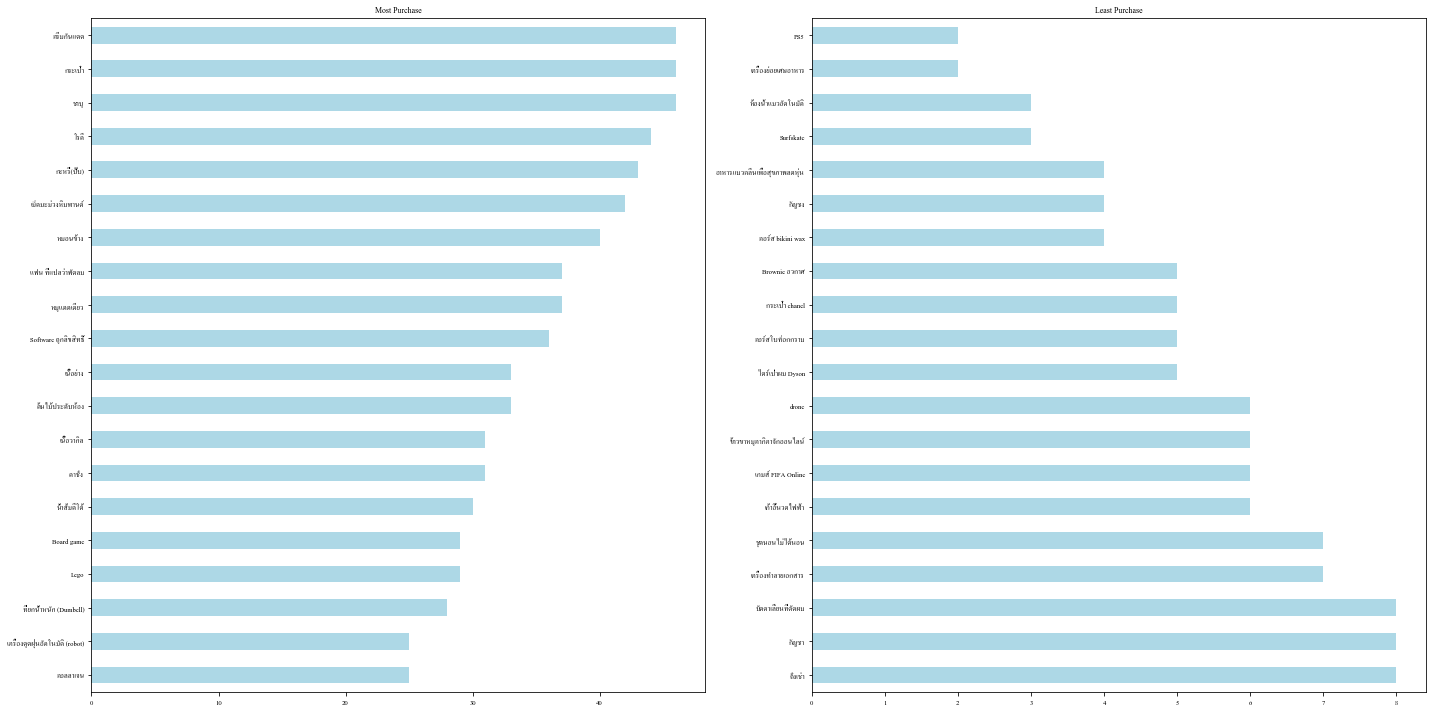

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(20, 10), tight_layout=True)
most_purchase_items.sort_values('count', ascending=True).plot.barh(ax=axes[0], title='Most Purchase', legend=False, color='lightblue')
least_purchase_items.plot.barh(ax=axes[1], title='Least Purchase', legend=False, color='lightblue')
plt.rc('axes', titlesize=24)
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)
plt.show()

## Association Rule Mining

In [13]:
frequent_itemsets = apriori(df, min_support=0.5, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False])
rules["antecedent_len"] = rules["antecedents"].apply(lambda x: len(x))
rules["consequents_len"] = rules["consequents"].apply(lambda x: len(x))
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len,consequents_len
106797,"(เม็ดมะม่วงหิมพานต์, เนื้อย่าง, ตาชั่ง )","(โรตี, แฟน ที่แปลว่าพัดลม, กะหรี่(ปั๊บ))",0.5,0.76087,0.5,1.0,1.314286,0.119565,inf,3,3
210810,"(เม็ดมะม่วงหิมพานต์, เนื้อย่าง, ตาชั่ง , กระเป๋า)","(โรตี, แฟน ที่แปลว่าพัดลม, กะหรี่(ปั๊บ))",0.5,0.76087,0.5,1.0,1.314286,0.119565,inf,4,3
210843,"(เม็ดมะม่วงหิมพานต์, เนื้อย่าง, ตาชั่ง )","(โรตี, แฟน ที่แปลว่าพัดลม, กะหรี่(ปั๊บ), กระเป๋า)",0.5,0.76087,0.5,1.0,1.314286,0.119565,inf,3,4
211188,"(เม็ดมะม่วงหิมพานต์, ชาบู, เนื้อย่าง, ตาชั่ง )","(โรตี, แฟน ที่แปลว่าพัดลม, กะหรี่(ปั๊บ))",0.5,0.76087,0.5,1.0,1.314286,0.119565,inf,4,3
211218,"(เม็ดมะม่วงหิมพานต์, เนื้อย่าง, ตาชั่ง )","(โรตี, แฟน ที่แปลว่าพัดลม, กะหรี่(ปั๊บ), ชาบู)",0.5,0.76087,0.5,1.0,1.314286,0.119565,inf,3,4
...,...,...,...,...,...,...,...,...,...,...,...
383768,"(ชาบู, ครีมกันแดด)","(โรตี, เนื้อวากิล, กะหรี่(ปั๊บ), เนื้อย่าง, กร...",1.0,0.50000,0.5,0.5,1.000000,0.000000,1.0,2,8
383775,"(ชาบู, กระเป๋า)","(โรตี, เนื้อวากิล, กะหรี่(ปั๊บ), เนื้อย่าง, เม...",1.0,0.50000,0.5,0.5,1.000000,0.000000,1.0,2,8
383784,(ครีมกันแดด),"(โรตี, เนื้อวากิล, กะหรี่(ปั๊บ), เนื้อย่าง, เม...",1.0,0.50000,0.5,0.5,1.000000,0.000000,1.0,1,9
383786,(กระเป๋า),"(โรตี, เนื้อวากิล, กะหรี่(ปั๊บ), เนื้อย่าง, คร...",1.0,0.50000,0.5,0.5,1.000000,0.000000,1.0,1,9


#### antecedents and consequents is 1 item

In [14]:
one_item_rule = rules[ 
    (rules['antecedent_len'] == 1) &
    (rules['consequents_len'] == 1) &
    (rules['confidence'] > 0.5) &
    (rules['lift'] > 1.05) 
]
one_item_rule["antecedents"] = one_item_rule["antecedents"].apply(lambda x: list(x)[0]).astype("unicode")
one_item_rule["consequents"] = one_item_rule["consequents"].apply(lambda x: list(x)[0]).astype("unicode")
one_item_rule = one_item_rule.sort_values('lift', ascending=False)
one_item_rule

ipykernel_launcher:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
ipykernel_launcher:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len,consequents_len
161,เนื้อวากิล,เนื้อย่าง,0.673913,0.717391,0.652174,0.967742,1.348974,0.168715,8.760870,1,1
160,เนื้อย่าง,เนื้อวากิล,0.717391,0.673913,0.652174,0.909091,1.348974,0.168715,3.586957,1,1
18,Lego,ต้นไม้ประดับห้อง,0.630435,0.717391,0.543478,0.862069,1.201672,0.091210,2.048913,1,1
19,ต้นไม้ประดับห้อง,Lego,0.717391,0.630435,0.543478,0.757576,1.201672,0.091210,1.524457,1,1
101,เนื้อย่าง,Lego,0.717391,0.630435,0.521739,0.727273,1.153605,0.069471,1.355072,1,1
100,Lego,เนื้อย่าง,0.630435,0.717391,0.521739,0.827586,1.153605,0.069471,1.639130,1,1
158,หมูแดดเดียว,เนื้อวากิล,0.804348,0.673913,0.608696,0.756757,1.122929,0.066635,1.340580,1,1
159,เนื้อวากิล,หมูแดดเดียว,0.673913,0.804348,0.608696,0.903226,1.122929,0.066635,2.021739,1,1
170,เนื้อวากิล,Software ถูกลิขสิทธิ์,0.673913,0.782609,0.586957,0.870968,1.112903,0.059546,1.684783,1,1
171,Software ถูกลิขสิทธิ์,เนื้อวากิล,0.782609,0.673913,0.586957,0.750000,1.112903,0.059546,1.304348,1,1


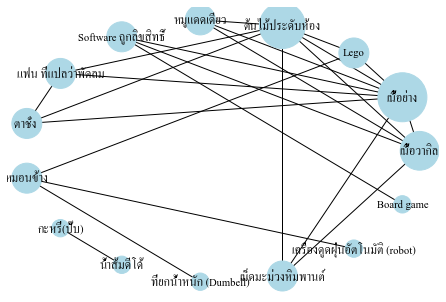

In [15]:
G = nx.from_pandas_edgelist(one_item_rule, source='antecedents', target='consequents', edge_attr='lift')
d = dict(G.degree)
nx.draw_circular(
    G, 
    node_size=[d[k] * 300 for k in dict(G.degree)], 
    with_labels=True, 
    font_family='Angsana New', 
    font_size='16',
    node_color='lightblue'
) 
plt.rcParams["figure.figsize"] = (10, 10)
plt.show()

#### antecedents and consequents is 2 items

In [16]:
two_items_rule = rules[ 
    (rules['antecedent_len'] == 2) &
    (rules['consequents_len'] == 2) &
    (rules['confidence'] > 0.9) &
    (rules['lift'] > 1.35) 
]
two_items_rule["antecedents"] = two_items_rule["antecedents"].apply(lambda x: list(x)).astype("unicode")
two_items_rule["consequents"] = two_items_rule["consequents"].apply(lambda x: list(x)).astype("unicode")
two_items_rule = two_items_rule.sort_values('lift', ascending=False)
two_items_rule

ipykernel_launcher:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
ipykernel_launcher:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len,consequents_len
14474,"['หมูแดดเดียว', 'เนื้อย่าง']","['เม็ดมะม่วงหิมพานต์', 'เนื้อวากิล']",0.630435,0.652174,0.586957,0.931034,1.427586,0.175803,5.043478,2,2
14473,"['หมูแดดเดียว', 'เนื้อวากิล']","['เม็ดมะม่วงหิมพานต์', 'เนื้อย่าง']",0.608696,0.695652,0.586957,0.964286,1.386161,0.163516,8.521739,2,2
10068,"['แฟน ที่แปลว่าพัดลม', 'เนื้อวากิล']","['กะหรี่(ปั๊บ)', 'เนื้อย่าง']",0.565217,0.695652,0.543478,0.961538,1.382212,0.150284,7.913043,2,2
12880,"['แฟน ที่แปลว่าพัดลม', 'เนื้อวากิล']","['เม็ดมะม่วงหิมพานต์', 'เนื้อย่าง']",0.565217,0.695652,0.543478,0.961538,1.382212,0.150284,7.913043,2,2
14444,"['หมูแดดเดียว', 'เนื้อย่าง']","['เนื้อวากิล', 'กระเป๋า']",0.630435,0.673913,0.586957,0.931034,1.381535,0.162098,4.728261,2,2
14459,"['หมูแดดเดียว', 'เนื้อย่าง']","['ชาบู', 'เนื้อวากิล']",0.630435,0.673913,0.586957,0.931034,1.381535,0.162098,4.728261,2,2
14487,"['หมูแดดเดียว', 'เนื้อย่าง']","['โรตี', 'เนื้อวากิล']",0.630435,0.673913,0.586957,0.931034,1.381535,0.162098,4.728261,2,2
14515,"['หมูแดดเดียว', 'เนื้อย่าง']","['ครีมกันแดด', 'เนื้อวากิล']",0.630435,0.673913,0.586957,0.931034,1.381535,0.162098,4.728261,2,2
14783,"['เนื้อย่าง', 'Software ถูกลิขสิทธิ์']","['เนื้อวากิล', 'กระเป๋า']",0.608696,0.673913,0.565217,0.928571,1.377880,0.155009,4.565217,2,2
14841,"['เนื้อย่าง', 'Software ถูกลิขสิทธิ์']","['ชาบู', 'เนื้อวากิล']",0.608696,0.673913,0.565217,0.928571,1.377880,0.155009,4.565217,2,2


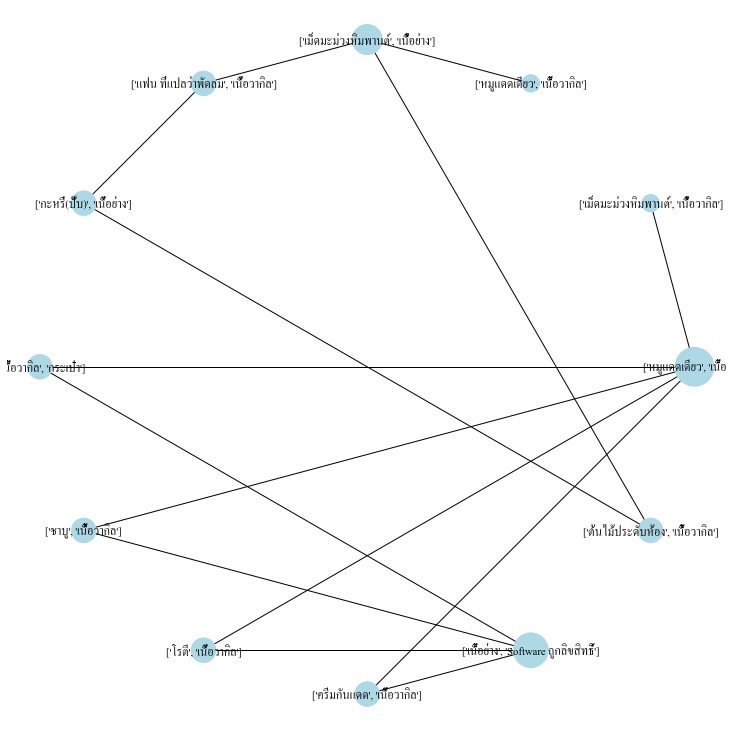

In [17]:
G = nx.from_pandas_edgelist(two_items_rule, source='antecedents', target='consequents')
d = dict(G.degree)
nx.draw_circular(
    G, 
    node_size=[d[k] * 300 for k in dict(G.degree)], 
    with_labels=True, 
    font_family='Angsana New', 
    font_size='16',
    node_color='lightblue'
) 
plt.rcParams["figure.figsize"] = (10, 10)
plt.show()

## Collaborative Filtering Model

## Matrix Factorization